In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('data/data_news_crawl_30k.csv' , encoding="utf-8", sep="|") 
df['category'] = df['category'].str.strip()


In [3]:
with open("data/vietnamese-stopwords.txt",encoding="utf8") as f:
    stopwords = f.readlines()
stopwords = [word.strip() for word in stopwords if word.strip()]
stopwords_set = set(stopwords)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31654 entries, 0 to 31653
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     31654 non-null  object
 1   title        31654 non-null  object
 2   description  31654 non-null  object
dtypes: object(3)
memory usage: 742.0+ KB
None


In [5]:
df.head(1)

category                                              title  \
0  giao-duc  Sinh viên quốc tế ở Harvard được đại học ở Tru...   

                                         description  
0  TRUNG QUỐC - Ngày 23/5, Đại học Khoa học và Cô...

In [6]:
df.head(1)
df["raw_text"] = df["title"] + df["description"]

In [7]:
print(df["category"].unique())

['giao-duc' 'the-thao' 'kinh-doanh' 'thoi-su' 'suc-khoe' 'giai-tri'
 'the-gioi' 'doi-song']


In [8]:
thethao_articles = df[df['category'] == 'the-thao']
print(f"Số lượng bài báo thể thao: {len(thethao_articles)}")
print(thethao_articles.info())

Số lượng bài báo thể thao: 3865
<class 'pandas.core.frame.DataFrame'>
Index: 3865 entries, 38 to 31645
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     3865 non-null   object
 1   title        3865 non-null   object
 2   description  3865 non-null   object
 3   raw_text     3865 non-null   object
dtypes: object(4)
memory usage: 151.0+ KB
None


In [9]:
giaoduc_articles = df[df['category'] == 'giao-duc']
print(f"Số lượng bài báo thể thao: {len(giaoduc_articles)}")
print(giaoduc_articles.info())

Số lượng bài báo thể thao: 4282
<class 'pandas.core.frame.DataFrame'>
Index: 4282 entries, 0 to 31653
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     4282 non-null   object
 1   title        4282 non-null   object
 2   description  4282 non-null   object
 3   raw_text     4282 non-null   object
dtypes: object(4)
memory usage: 167.3+ KB
None


In [10]:
kinhdoanh_articles = df[df['category'] == 'kinh-doanh']
print(f"Số lượng bài báo thể thao: {len(kinhdoanh_articles)}")
print(giaoduc_articles.info())

Số lượng bài báo thể thao: 3643
<class 'pandas.core.frame.DataFrame'>
Index: 4282 entries, 0 to 31653
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     4282 non-null   object
 1   title        4282 non-null   object
 2   description  4282 non-null   object
 3   raw_text     4282 non-null   object
dtypes: object(4)
memory usage: 167.3+ KB
None


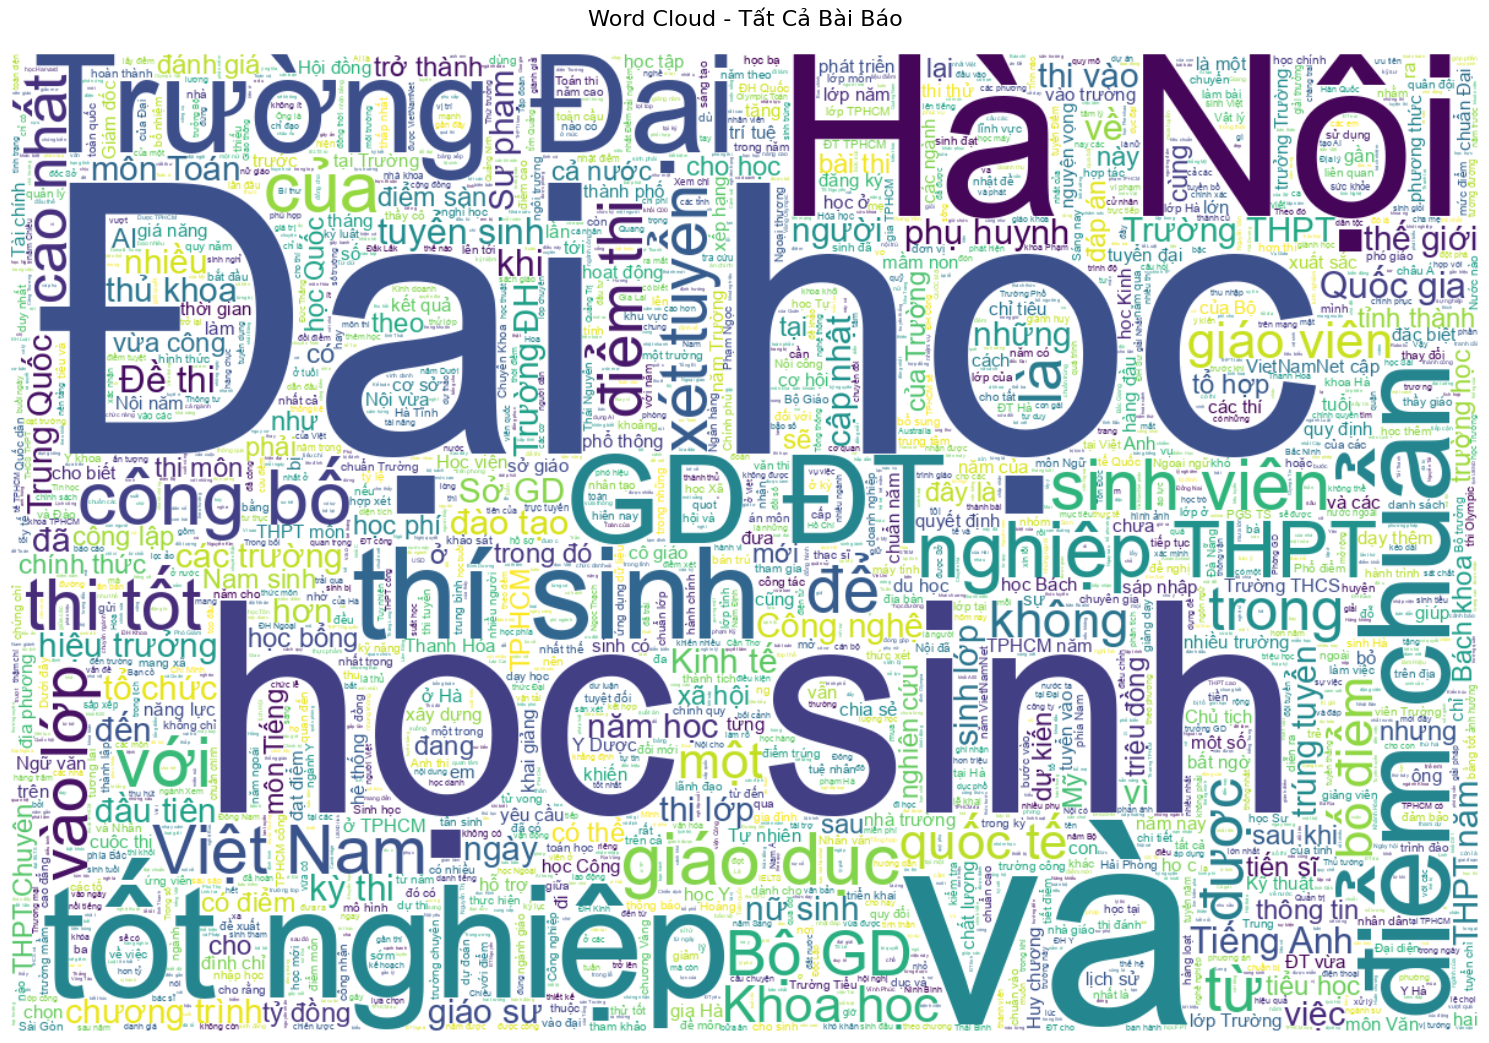

In [11]:
from wordcloud import WordCloud

all_text = ' '.join(giaoduc_articles['raw_text'].tolist())

wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/arial.ttf', 
    width=1200,
    height=800,
    background_color='white',
    max_words=2500,
    colormap='viridis',
    min_font_size=3
).generate(all_text)
plt.figure(figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Tất Cả Bài Báo', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

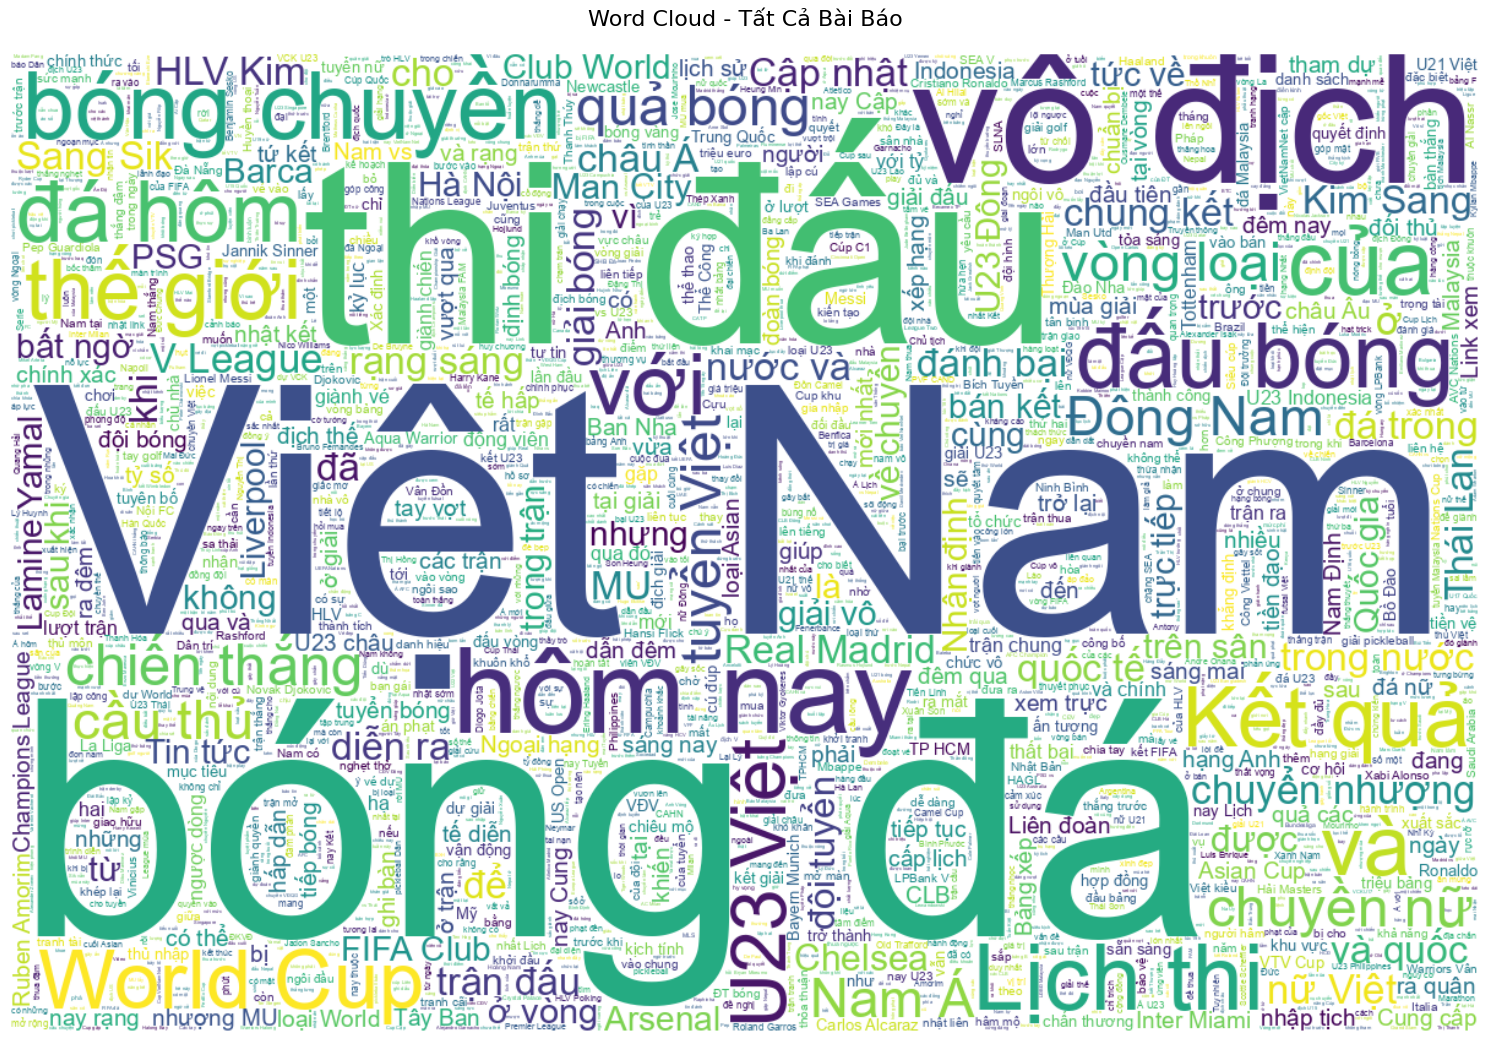

In [12]:
all_text = ' '.join(thethao_articles['raw_text'].tolist())

wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/arial.ttf', 
    width=1200,
    height=800,
    background_color='white',
    max_words=2500,
    colormap='viridis',
    min_font_size=3
).generate(all_text)
plt.figure(figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Tất Cả Bài Báo', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

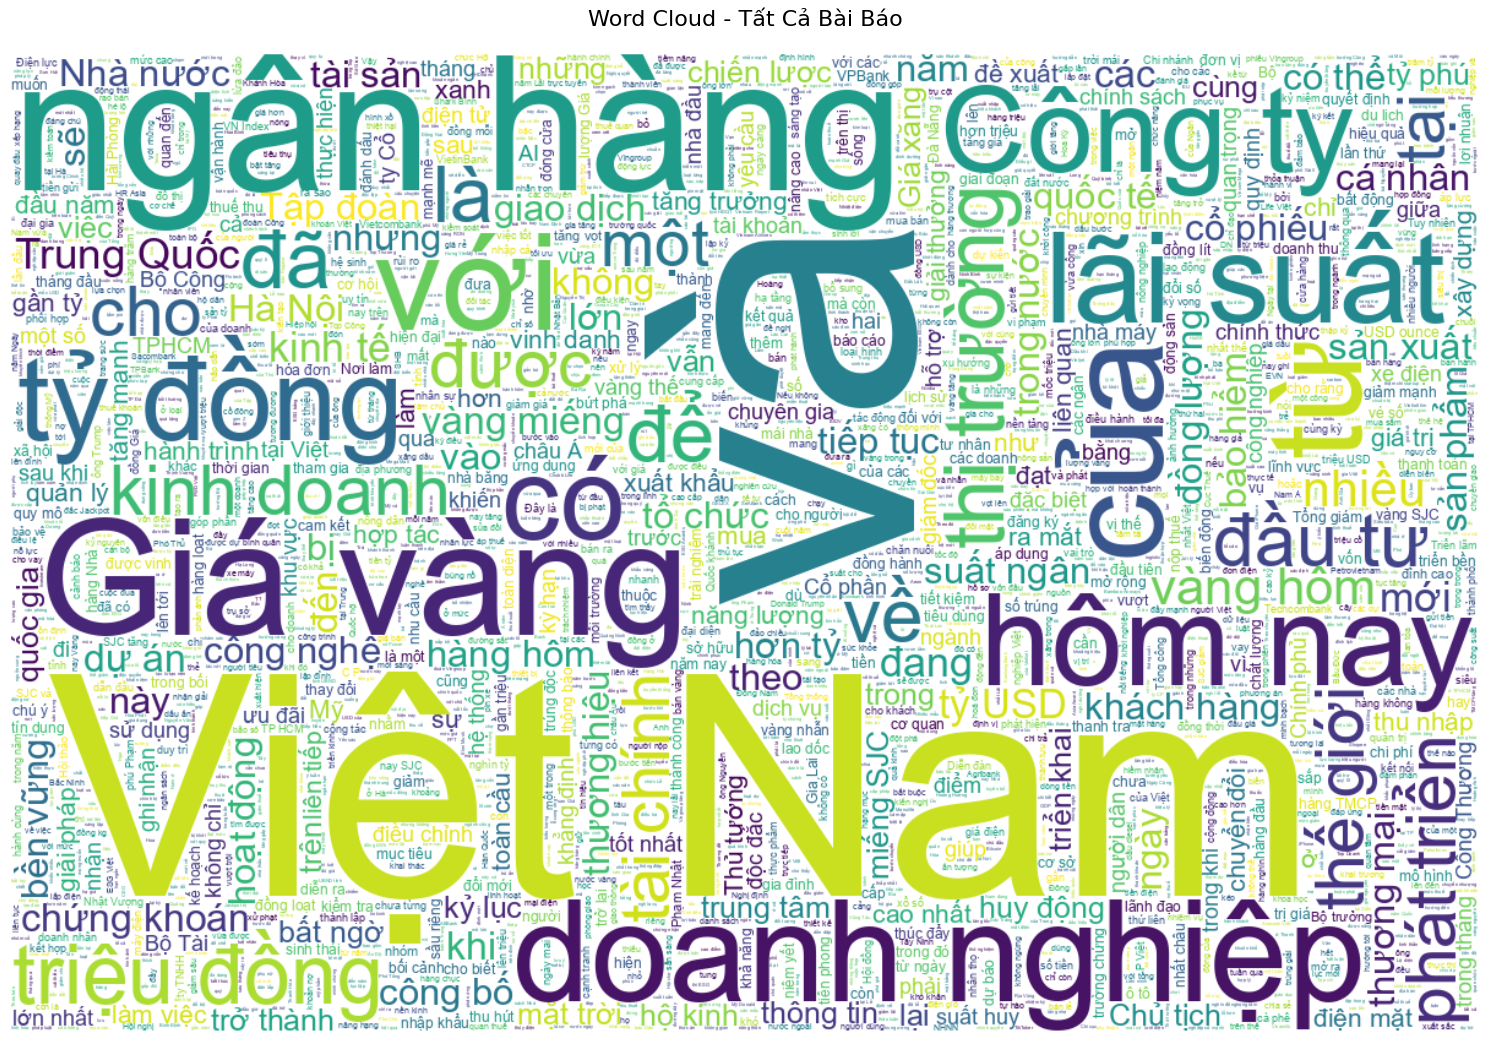

In [13]:
from wordcloud import WordCloud

all_text = ' '.join(kinhdoanh_articles['raw_text'].tolist())

wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/arial.ttf', 
    width=1200,
    height=800,
    background_color='white',
    max_words=2500,
    colormap='viridis',
    min_font_size=3
).generate(all_text)
plt.figure(figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Tất Cả Bài Báo', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [14]:
def preprocess_text(text, stopwords_set=stopwords_set):
    """
    Remove stopwords từ văn bản tiếng Việt
    """
    if pd.isna(text):
        return ""
    
    text = text.lower()
    
    text = re.sub(r'[^a-zA-ZÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠ-ỹ\s]', '', text)
    
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords_set and len(word) > 1]
    
    return ' '.join(filtered_words)

df['combined_text'] = df['title'].apply(preprocess_text) + ' ' + df['description'].apply(preprocess_text)


In [15]:
df.head(10)

category                                              title  \
0  giao-duc  Sinh viên quốc tế ở Harvard được đại học ở Tru...   
1  giao-duc  Những thí sinh đầu tiên bước vào kỳ thi lớp 10...   
2  giao-duc  Lý do thầy dạy Văn mong phụ huynh đừng lên mạn...   
3  giao-duc  Ai từng được Bác Hồ mời làm Bộ trưởng nhưng lạ...   
4  giao-duc  Thầy hiệu trưởng góp 1 tỷ đồng tặng học bổng s...   
5  giao-duc  Công nhận kết quả trúng tuyển viên chức cho 61...   
6  giao-duc  Chị gái bật khóc lên nhận bằng tốt nghiệp thay...   
7  giao-duc  Hơn 850 học sinh Hà Nội cúi đầu cảm ơn cha mẹ ...   
8  giao-duc  Học sinh cấp 3 đứng tên bài báo khoa học quốc ...   
9  giao-duc  Đề môn Toán của tỉnh đầu tiên thi vào lớp 10 t...   

                                         description  \
0  TRUNG QUỐC - Ngày 23/5, Đại học Khoa học và Cô...   
1  Sáng nay 24/5, các thí sinh bước vào kỳ thi và...   
2  Trong cuộc họp cuối năm học, tôi trao phiếu đi...   
3  Từng được Bác Hồ mời làm Bộ trưởng Bộ Giáo dục...   
4  Hiệu trưởng Trường Đại học Việt Nhật - Đại học...   
5  UBND huyện Ia Grai vừa có văn bản công nhận lạ...   
6  Lên bục nhận bằng tốt nghiệp thay em gái, chị ...   
7  Sáng 23/5, Sở GD-ĐT Hà Nội tổ chức lễ tuyên dư...   
8  Gần đây, trên một số diễn đàn về liêm chính kh...   
9  Sáng nay 23/5, học sinh tỉnh Bạc Liêu đã trải ...   

                                            raw_text  \
0  Sinh viên quốc tế ở Harvard được đại học ở Tru...   
1  Những thí sinh đầu tiên bước vào kỳ thi lớp 10...   
2  Lý do thầy dạy Văn mong phụ huynh đừng lên mạn...   
3  Ai từng được Bác Hồ mời làm Bộ trưởng nhưng lạ...   
4  Thầy hiệu trưởng góp 1 tỷ đồng tặng học bổng s...   
5  Công nhận kết quả trúng tuyển viên chức cho 61...   
6  Chị gái bật khóc lên nhận bằng tốt nghiệp thay...   
7  Hơn 850 học sinh Hà Nội cúi đầu cảm ơn cha mẹ ...   
8  Học sinh cấp 3 đứng tên bài báo khoa học quốc ...   
9  Đề môn Toán của tỉnh đầu tiên thi vào lớp 10 t...   

                                       combined_text  
0  sinh viên quốc tế harvard đại học trung quốc c...  
1  thí sinh đầu tiên kỳ thi lớp hà nội thí sinh k...  
2  lý thầy dạy văn mong phụ huynh đừng mạng khoe ...  
3  hồ mời trưởng chối hồ mời trưởng giáo dục chối...  
4  thầy hiệu trưởng góp tỷ đồng tặng học bổng sin...  
5  công kết trúng tuyển viên chức giáo viên hủy t...  
6  gái bật khóc nghiệp thay bục nghiệp thay gái p...  
7  học sinh hà nội cúi đầu cảm ơn mẹ lễ tuyên dươ...  
8  học sinh đứng báo khoa học quốc tế tranh luận ...  
9  đề môn toán tỉnh đầu tiên thi lớp học sinh tỉn...

In [16]:
tfidf_vectorizer = TfidfVectorizer(
    min_df=2,          
    max_df=0.8,        
)

X_tfidf = tfidf_vectorizer.fit_transform(df['combined_text'])

# Encode labels (categories)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape của TF-IDF matrix:", X_tfidf.shape)
print("Số lượng categories:", len(label_encoder.classes_))
print("Categories:", label_encoder.classes_)
print("\nKích thước tập train:", X_train.shape)
print("Kích thước tập test:", X_test.shape)


print(f"\nSố lượng features (từ vựng): {len(tfidf_vectorizer.get_feature_names_out())}")
print("\nMột số features quan trọng:")
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names[:20])  

Shape của TF-IDF matrix: (31654, 7606)
Số lượng categories: 8
Categories: ['doi-song' 'giai-tri' 'giao-duc' 'kinh-doanh' 'suc-khoe' 'the-gioi'
 'the-thao' 'thoi-su']

Kích thước tập train: (25323, 7606)
Kích thước tập test: (6331, 7606)

Số lượng features (từ vựng): 7606

Một số features quan trọng:
['aaron' 'aasm' 'ab' 'abbank' 'abbas' 'abbott' 'abc' 'abf' 'abipha'
 'abraham' 'abrams' 'abu' 'ac' 'academic' 'academy' 'acb' 'acca' 'acecook'
 'acetonitrile' 'achraf']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Định nghĩa các mô hình và tham số cần tối ưu
models_params = {
    'Naive Bayes': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0, 2.0]
        }
    },
    'SVM': {
        'model': SVC(kernel='linear', random_state=42),
        'params': {
            'C': [0.1, 0.25, 0.5, 0.75, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [2, 5, 10, 20],
            'criterion': ['gini', 'entropy']
        }
    }
}

# Dictionary để lưu kết quả
best_models = {}
results = {}

# Training và tối ưu siêu tham số
for name, config in models_params.items():
    print(f"\n{'='*60}")
    print(f"=== {name} ===")
    print(f"{'='*60}")
    
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    print(f"Đang tối ưu siêu tham số cho {name}...")
    grid_search.fit(X_train, y_train)
    
    # Lưu mô hình tốt nhất
    best_models[name] = grid_search.best_estimator_
    
    # Dự đoán
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Lưu kết quả
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_accuracy': accuracy,
        'y_pred': y_pred,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"\nBest Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Vẽ confusion matrix cho tất cả các mô hình
n_models = len(models_params)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    
    # Vẽ heatmap
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=label_encoder.classes_,
        yticklabels=label_encoder.classes_,
        ax=axes[idx],
        cbar_kws={'label': 'Count'}
    )
    
    axes[idx].set_title(f'{name}\nAccuracy: {result["test_accuracy"]:.4f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)
    axes[idx].tick_params(axis='both', labelsize=9)

# Ẩn subplot thừa nếu có
if n_models < len(axes):
    axes[n_models].axis('off')

plt.tight_layout()
plt.savefig('confusion_matrices_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

# So sánh accuracy của các mô hình
print("\n" + "="*60)
print("TỔNG KẾT KẾT QUẢ")
print("="*60)
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        'Model': name,
        'CV Score': result['best_score'],
        'Test Accuracy': result['test_accuracy']
    })
    print(f"{name:20s} - CV: {result['best_score']:.4f}, Test: {result['test_accuracy']:.4f}")

# Vẽ biểu đồ so sánh
fig, ax = plt.subplots(figsize=(12, 6))
models_list = list(results.keys())
cv_scores = [results[m]['best_score'] for m in models_list]
test_scores = [results[m]['test_accuracy'] for m in models_list]

x = np.arange(len(models_list))
width = 0.35

bars1 = ax.bar(x - width/2, cv_scores, width, label='CV Score', color='skyblue')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test Accuracy', color='lightcoral')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Thêm giá trị lên các cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Tìm mô hình tốt nhất
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
print(f"\n{'='*60}")
print(f"MÔ HÌNH TỐT NHẤT: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")
print(f"Best Parameters: {results[best_model_name]['best_params']}")
print(f"{'='*60}")


=== Naive Bayes ===
Đang tối ưu siêu tham số cho Naive Bayes...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best Parameters: {'alpha': 0.1}
Best Cross-Validation Score: 0.8487
Test Accuracy: 0.8515

Classification Report:
              precision    recall  f1-score   support

    doi-song       0.75      0.71      0.73       739
    giai-tri       0.82      0.86      0.84       747
    giao-duc       0.89      0.83      0.86       857
  kinh-doanh       0.81      0.84      0.82       729
    suc-khoe       0.87      0.87      0.87       774
    the-gioi       0.94      0.87      0.91       832
    the-thao       0.99      0.96      0.98       773
     thoi-su       0.76      0.85      0.80       880

    accuracy                           0.85      6331
   macro avg       0.85      0.85      0.85      6331
weighted avg       0.85      0.85      0.85      6331


=== SVM ===
Đang tối ưu siêu tham số cho SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits